# Exploratory  Data Analysis with Python
### Creative Music vs. Lofi Music
[Takato Matsumoto](takato.matsumoto0114@gmail.com) 




In [1]:
#ライブラリの読み込み
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os.path
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 16
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)
pd.options.display.max_columns = None

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../datasets/features_librosa_vivaldi_haradasan.csv')
df_lofi = pd.read_csv('../datasets/features_lo_fi.csv')

In [3]:
df

,song_id,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_cqt_mean,chroma_cens_mean,melspectrogram_mean,tonnetz_mean,rhythm.tempogram_mean,mfcc_mean,onset_detect_mean,harmonic_mean,percussive_mean,rms_mean,zero_crossing_rate_mean,chroma_stft_std,spectral_centroid_std,spectral_bandwidth_std,spectral_rolloff_std,chroma_cqt_std,chroma_cens_std,melspectrogram_std,tonnetz_std,rhythm.tempogram_std,mfcc_std,onset_detect_std,harmonic_std,percussive_std,rms_std,zero_crossing_rate_std
0,Barely Legal,0.504369,2292.694654,2734.548565,4340.770992,0.538719,0.257666,10.759484,0.017084,0.212418,2.986807,8583.504651,1.492254e-05,0.000037,0.227138,0.055477,0.271681,989.771476,793.162800,1790.230263,0.256035,0.130159,65.756770,0.060790,0.249281,49.612663,5467.156610,0.166609,0.117275,0.093255,0.044199
1,Gone Are The Days (feat. Uyama Hiroto),0.535372,3116.401435,4202.807771,7007.660361,0.563604,0.265025,15.915632,0.002672,0.192701,6.401249,15256.399550,-1.414562e-06,0.000046,0.265163,0.046188,0.269636,1796.274494,1138.884086,4349.351528,0.251776,0.114129,139.632950,0.054485,0.217876,43.193775,8748.695175,0.243644,0.069269,0.109682,0.044885
2,More Mess on My Thing,0.433514,3012.751078,3243.923271,5666.767043,0.502631,0.255092,5.639179,-0.006667,0.145873,0.348947,10503.221053,2.396317e-05,0.000309,0.165370,0.076410,0.290696,1594.046159,908.411824,2685.185306,0.274208,0.133375,33.013844,0.067909,0.178657,51.514256,6054.595121,0.134148,0.087949,0.080149,0.069350
3,Bubblehouse,0.475723,3358.782892,4288.379851,7642.471201,0.461729,0.244002,9.090590,0.016193,0.115704,0.207299,11462.236593,5.056599e-06,-0.000020,0.194582,0.050476,0.313603,2114.679583,1343.193149,4515.895563,0.291435,0.154260,64.721100,0.084638,0.143767,54.674503,6401.821287,0.173296,0.079325,0.094638,0.062177
4,"01 The Four Seasons, Violin Concerto No. 1 in ...",0.275938,2262.886890,2579.598702,4050.622568,0.411288,0.228849,0.968720,0.012763,0.273362,-6.028261,7869.425729,-1.226850e-04,-0.000056,0.062658,0.065571,0.296399,667.013035,540.726712,1175.833040,0.276317,0.175453,8.066182,0.088093,0.299736,71.278500,4512.132327,0.068612,0.014198,0.043006,0.025847
5,Nightmusic,0.633283,3598.680313,3929.935684,8048.745323,0.529658,0.257880,13.441958,0.018215,0.169273,6.257111,10054.261233,-1.108695e-05,0.000080,0.249034,0.055012,0.250232,1274.438921,762.574395,2510.341557,0.265362,0.126904,116.953250,0.054054,0.208080,41.509315,6226.483882,0.223690,0.091571,0.102741,0.039682
6,Here In Your Bedroom,0.535356,3409.682446,3735.113582,7122.951981,0.494484,0.253538,11.020512,0.008650,0.213291,6.386668,6402.631321,1.286941e-05,0.000067,0.238356,0.072676,0.274905,1055.071498,778.601276,2162.636554,0.265681,0.137716,55.241116,0.065618,0.249328,39.987830,4787.928392,0.183001,0.101213,0.076241,0.039566
7,Mockingbird,0.455695,2742.510338,3485.898797,5908.190037,0.502736,0.250085,14.988336,0.023076,0.216004,4.608219,9211.184146,-6.641493e-06,-0.000432,0.276054,0.049525,0.283121,1082.212777,797.583055,2455.969186,0.267143,0.144189,73.475610,0.069175,0.251044,43.296032,5843.616183,0.218341,0.105797,0.071146,0.029815
8,Brazil,0.475623,2441.286383,3075.927026,5164.756631,0.555911,0.266110,10.242627,0.006716,0.203602,3.976885,10441.076212,-1.043706e-05,0.000117,0.220219,0.047556,0.284994,846.321631,748.815534,1877.805112,0.250597,0.111222,58.920753,0.055063,0.232883,47.562077,6437.852239,0.165762,0.098062,0.082485,0.023072
9,She's So Lovely,0.409724,3860.784430,4395.687406,8640.015089,0.503721,0.254077,15.993678,0.014952,0.225031,4.564925,8287.111732,-4.478544e-05,-0.000718,0.280901,0.082393,0.295266,1547.263570,1049.935638,3400.638900,0.268605,0.137033,88.085106,0.071371,0.259262,38.684500,5105.201531,0.222966,0.119666,0.113028,0.062249


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   song_id                  16 non-null     object 
 1   chroma_stft_mean         16 non-null     float64
 2   spectral_centroid_mean   16 non-null     float64
 3   spectral_bandwidth_mean  16 non-null     float64
 4   spectral_rolloff_mean    16 non-null     float64
 5   chroma_cqt_mean          16 non-null     float64
 6   chroma_cens_mean         16 non-null     float64
 7   melspectrogram_mean      16 non-null     float64
 8   tonnetz_mean             16 non-null     float64
 9   rhythm.tempogram_mean    16 non-null     float64
 10  mfcc_mean                16 non-null     float64
 11  onset_detect_mean        16 non-null     float64
 12  harmonic_mean            16 non-null     float64
 13  percussive_mean          16 non-null     float64
 14  rms_mean                 16 

# 1. Histogram


In [5]:
df = df.drop(['song_id'], axis=1)
df_lofi = df_lofi.drop(['song_id'], axis=1)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


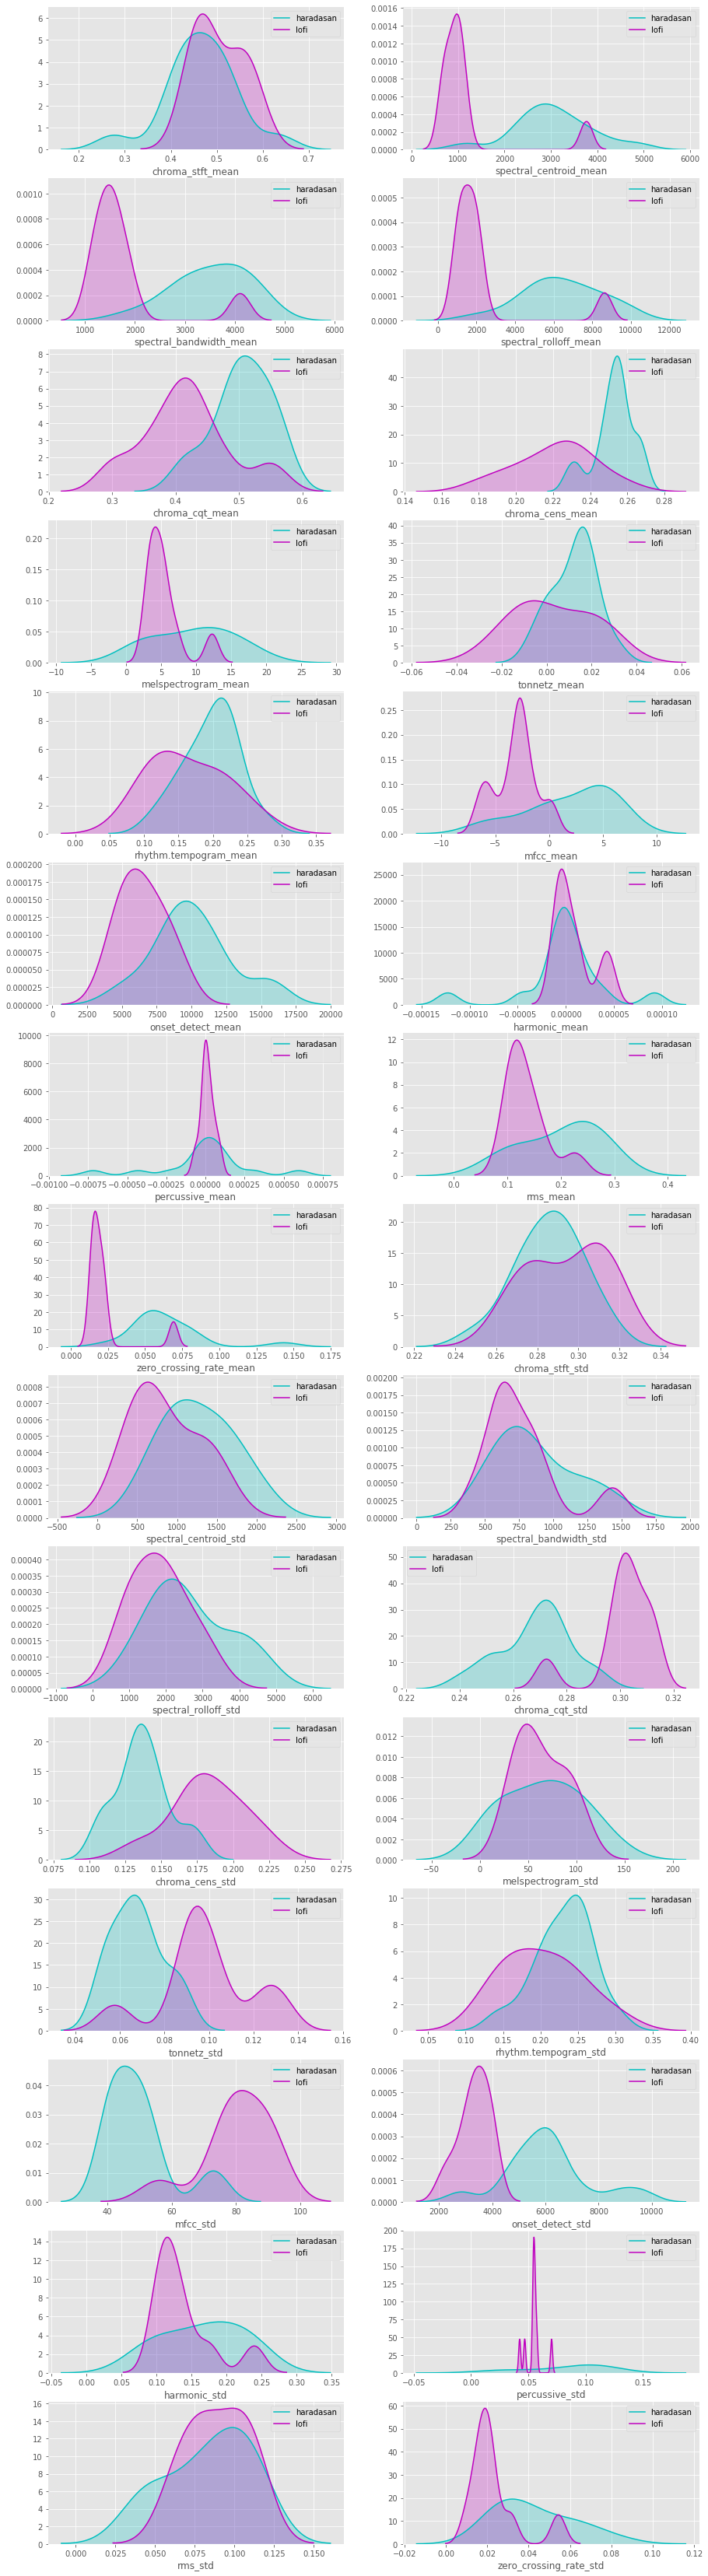

In [6]:
histo_rows = int(len(df.columns) / 2) #adjusting figsize
figsize_rows = histo_rows*4
f, axes = plt.subplots(histo_rows, 2, figsize=(15, figsize_rows), sharex=False)
sns.despine(left=True)

for i, col in enumerate(df.columns):
    sns.distplot(df[col] ,kde=True, rug=False, hist=False, kde_kws={"shade": True}, color='c', ax=axes[int(i /2), i%2], label='haradasan')
    sns.distplot(df_lofi[col] ,kde=True, rug=False, hist=False, kde_kws={"shade": True}, color='m', ax=axes[int(i /2), i%2], label='lofi')
plt.savefig('histogram_features.png')


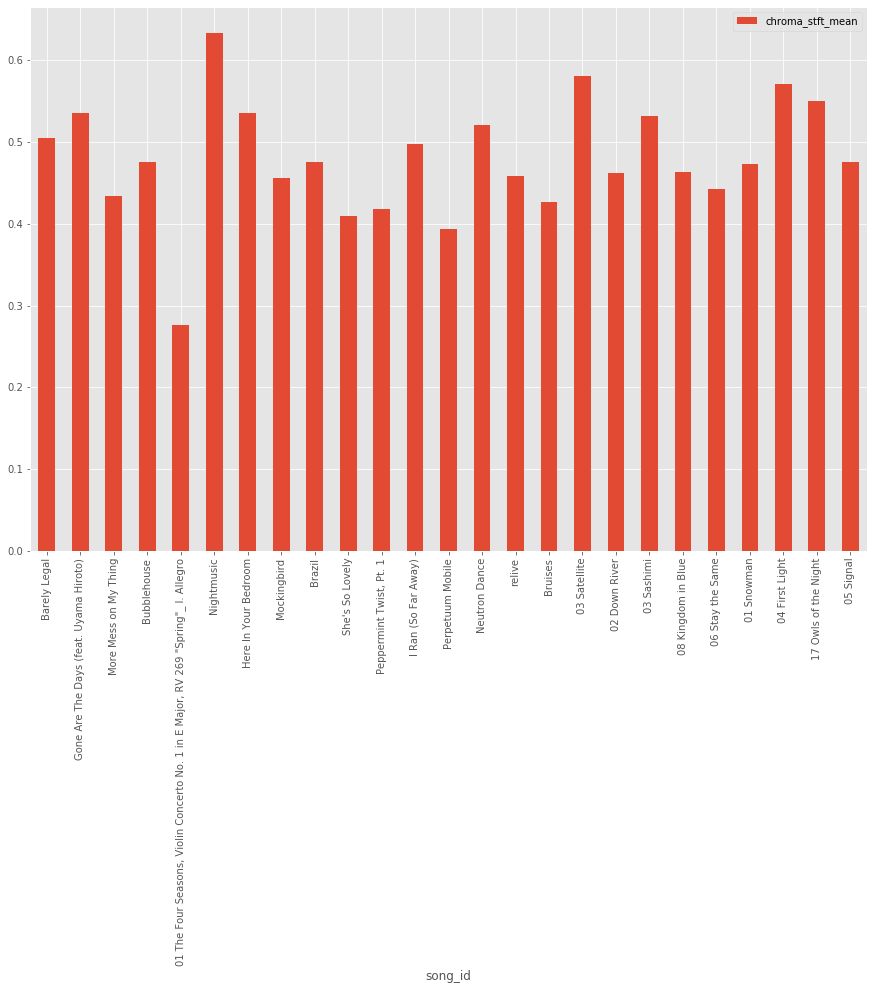

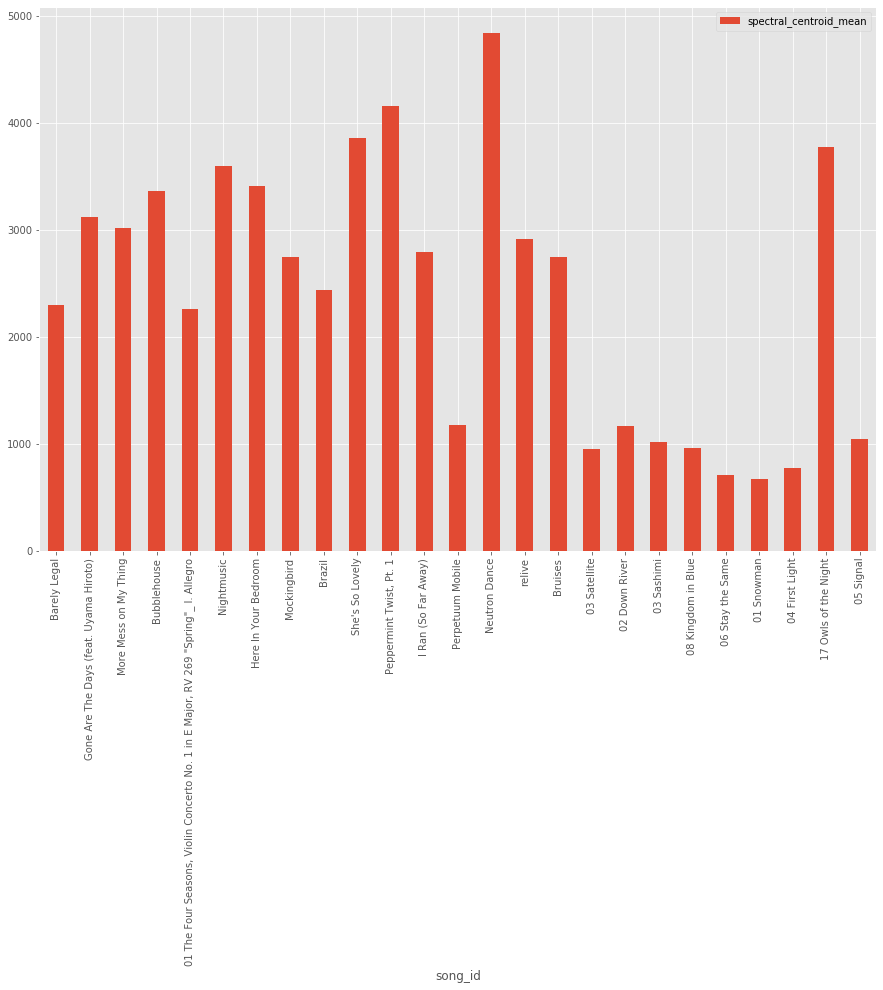

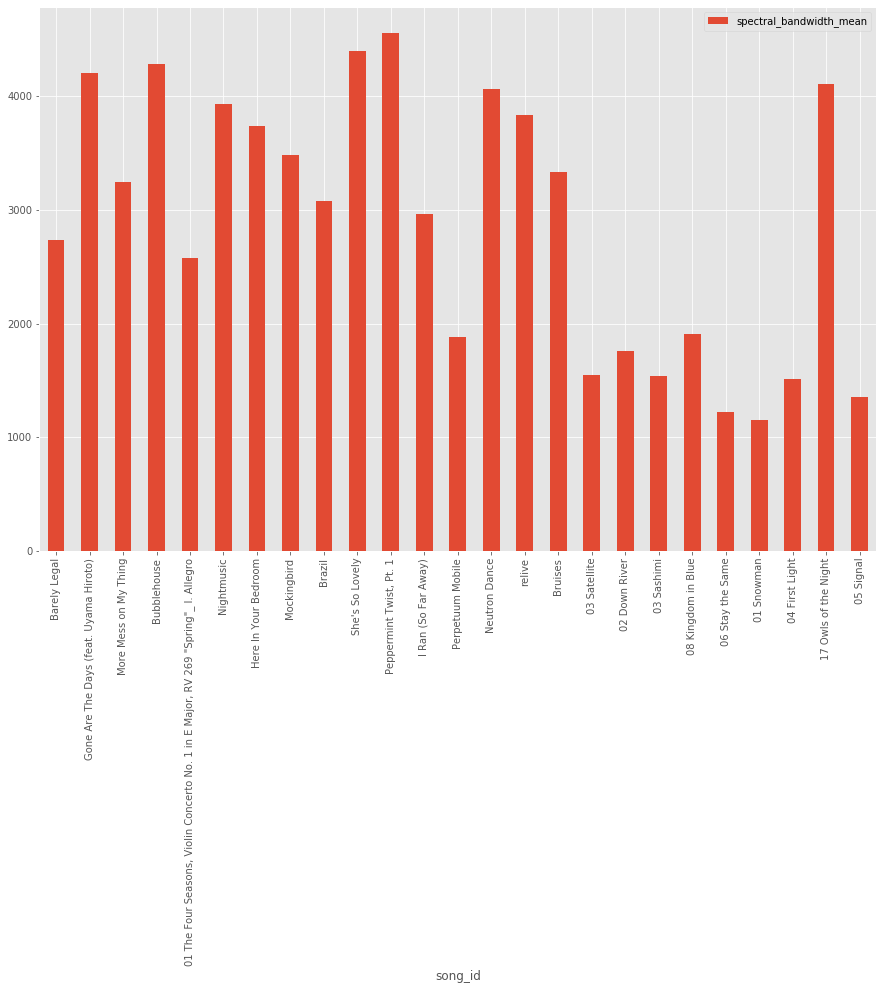

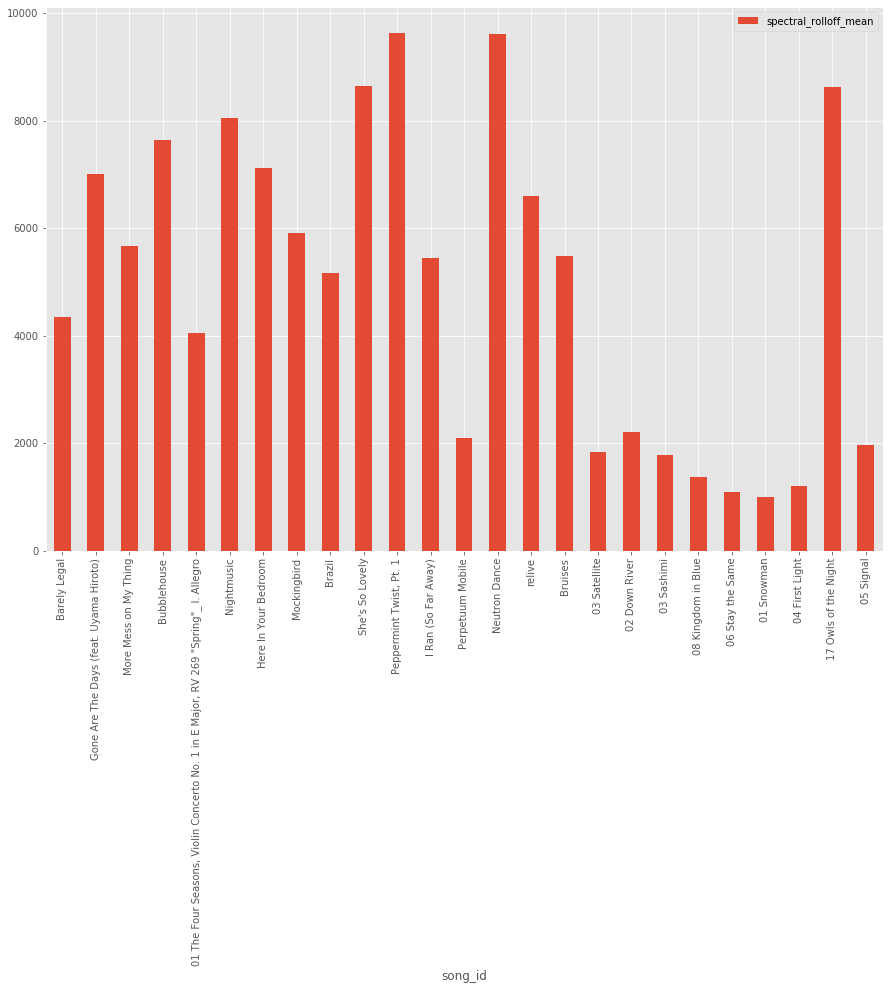

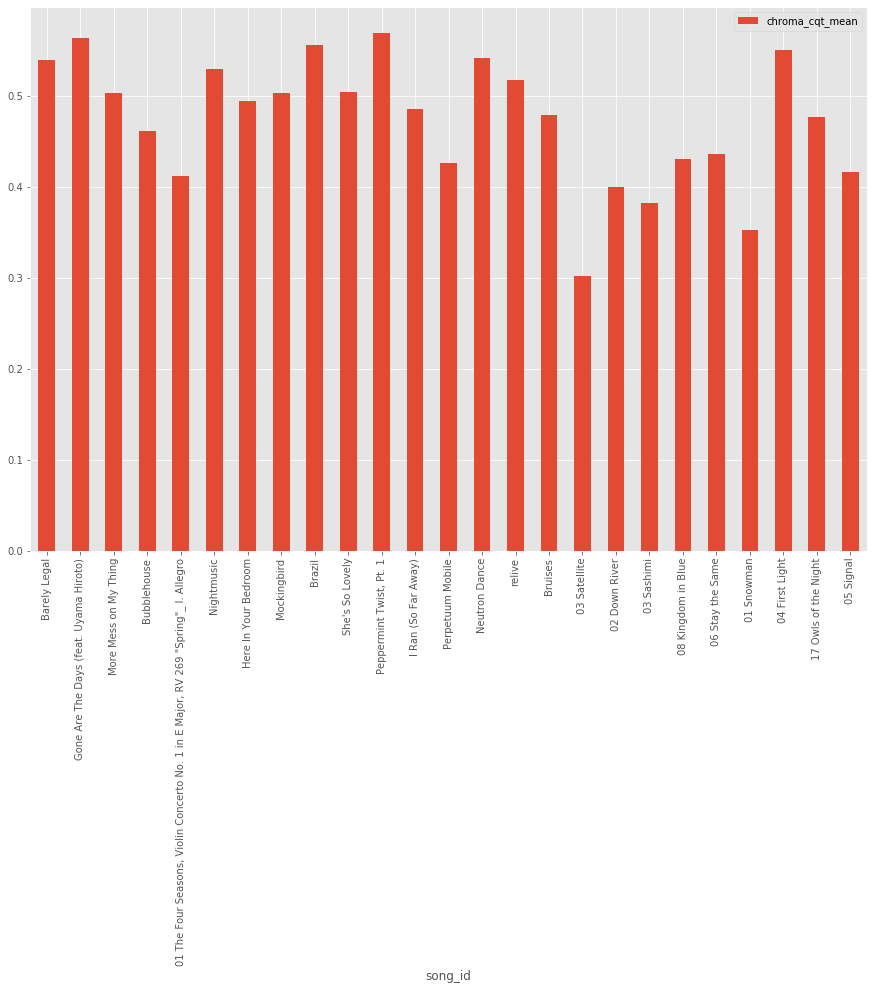

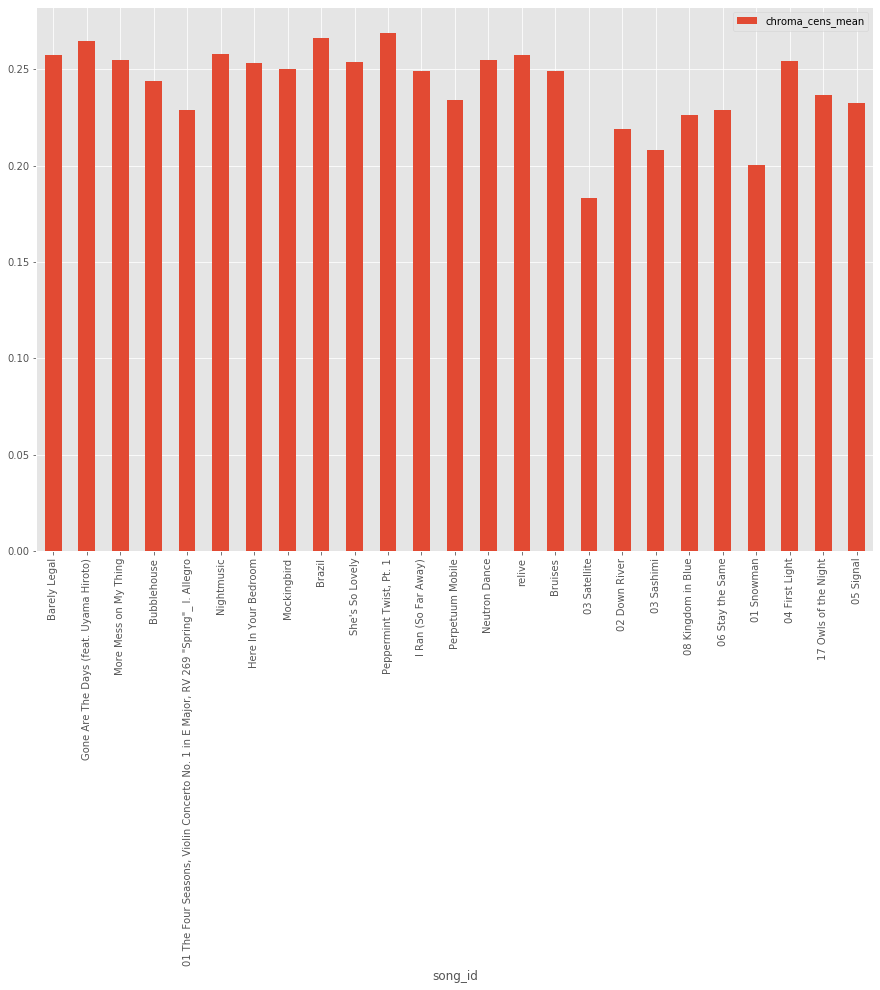

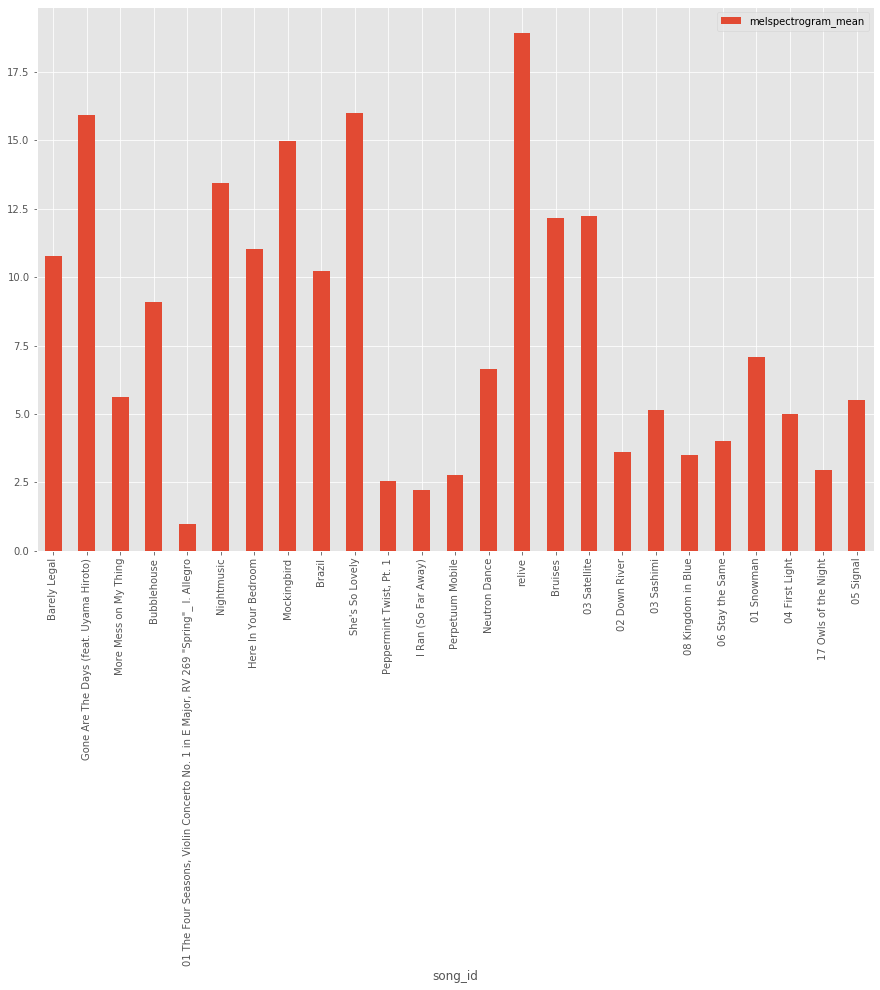

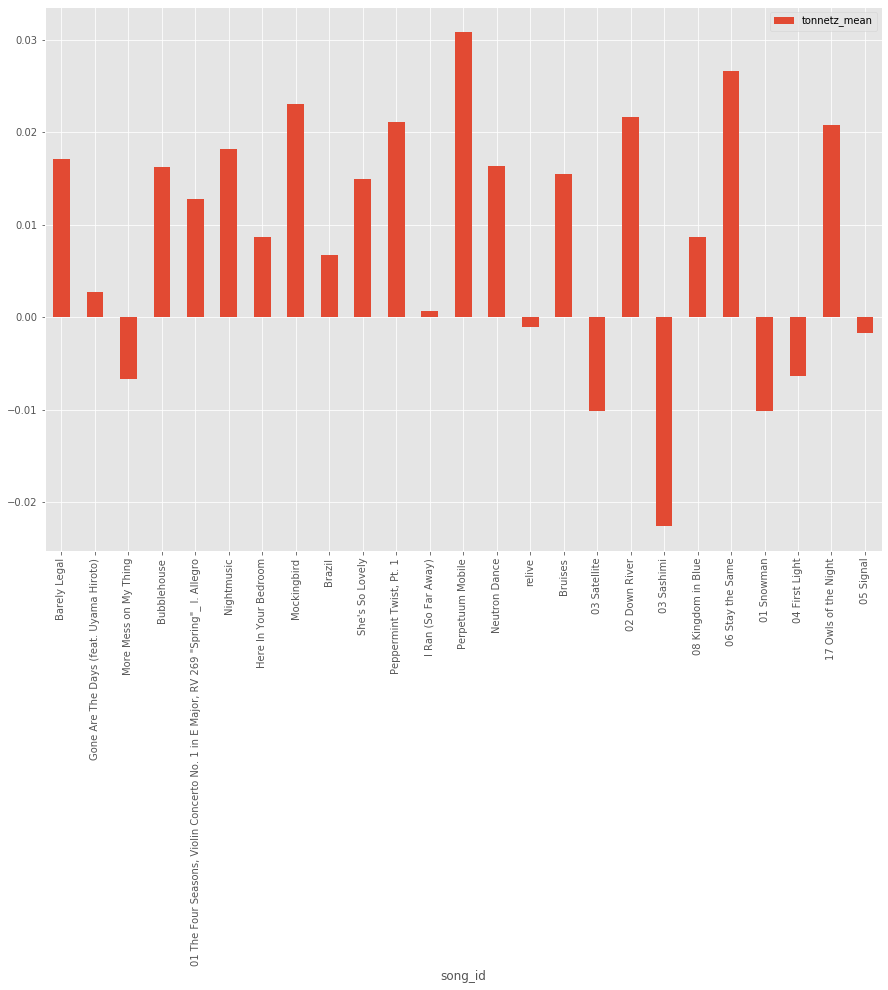

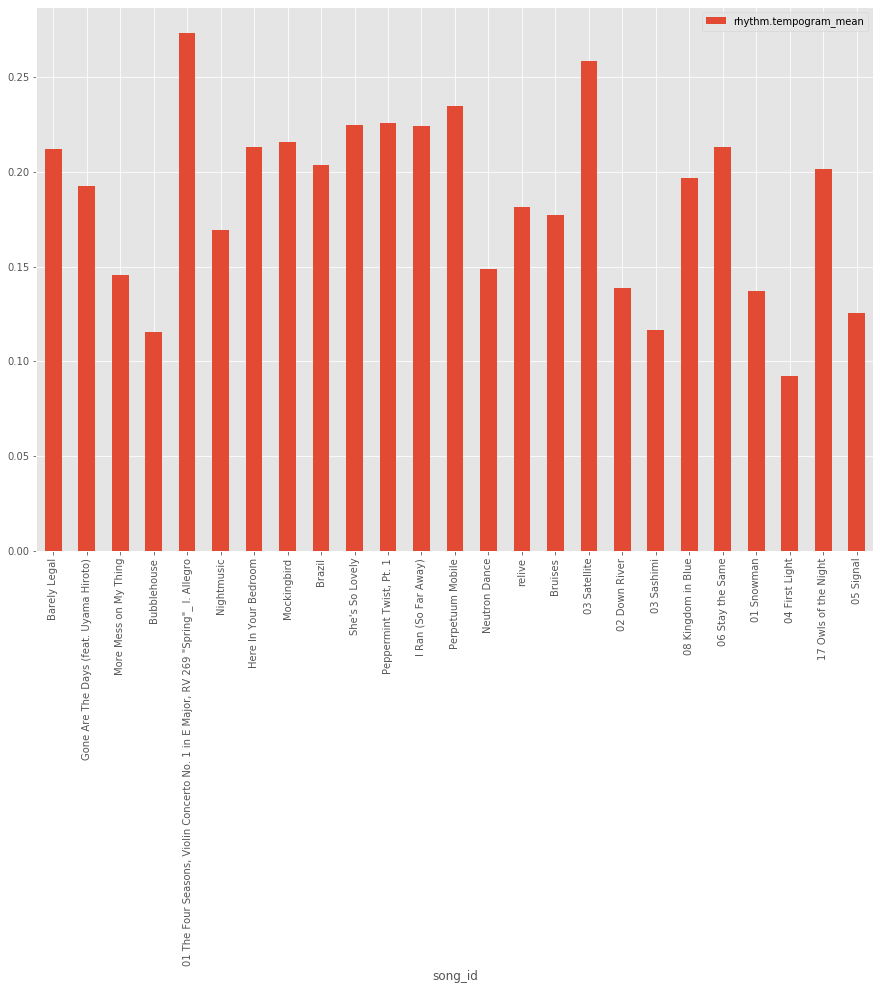

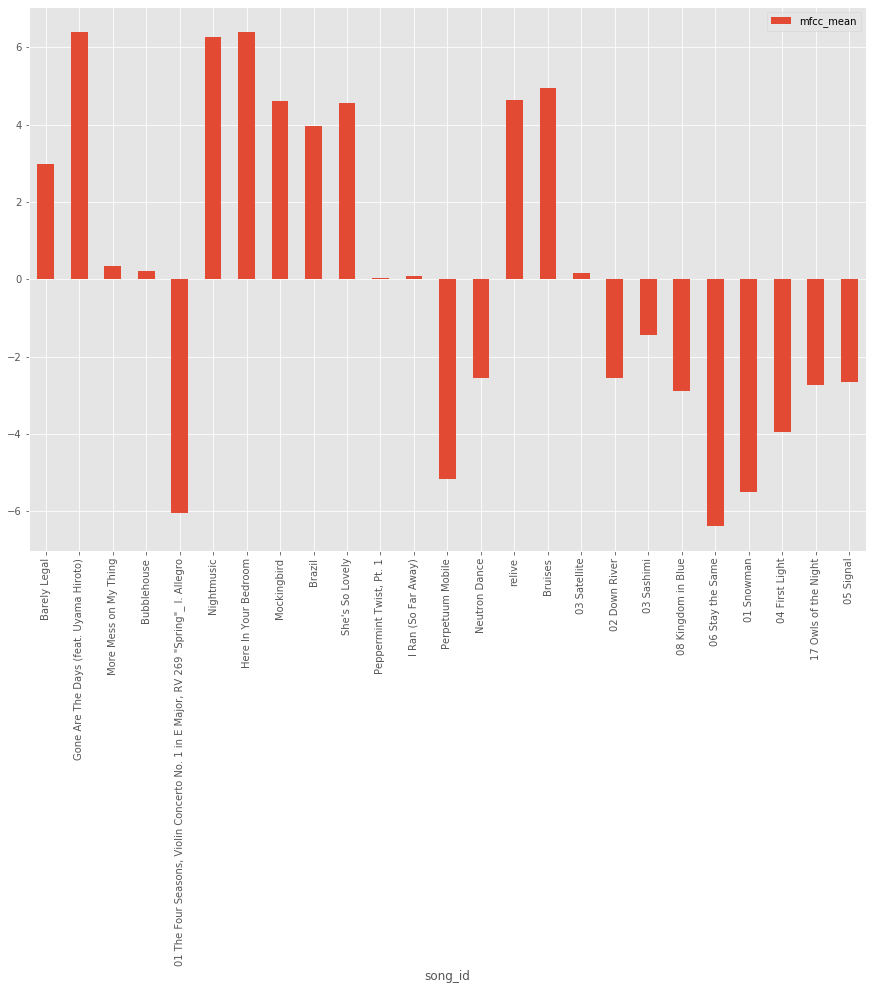

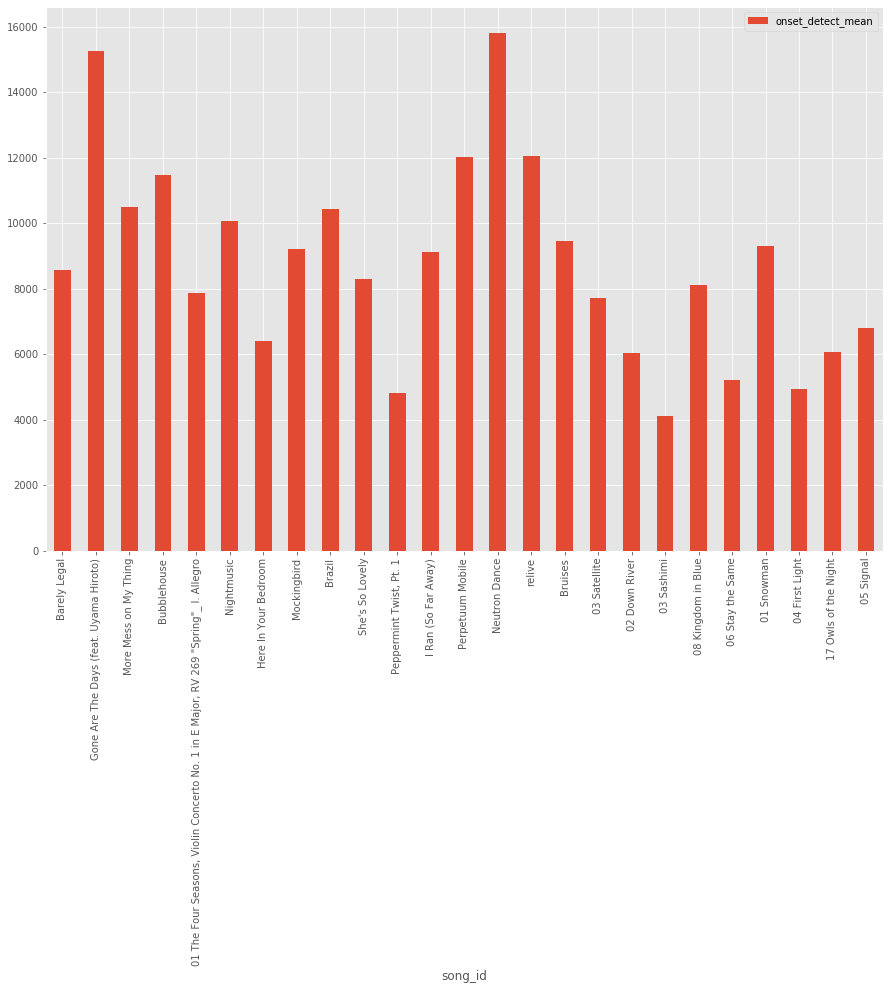

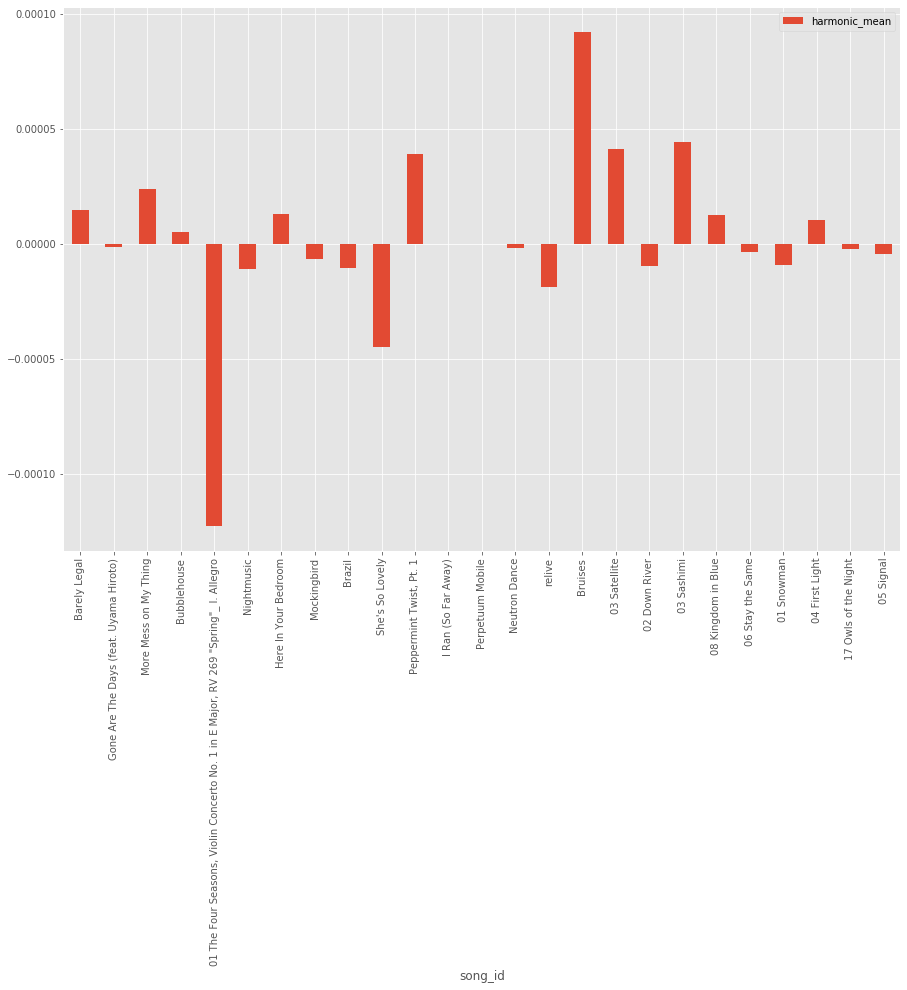

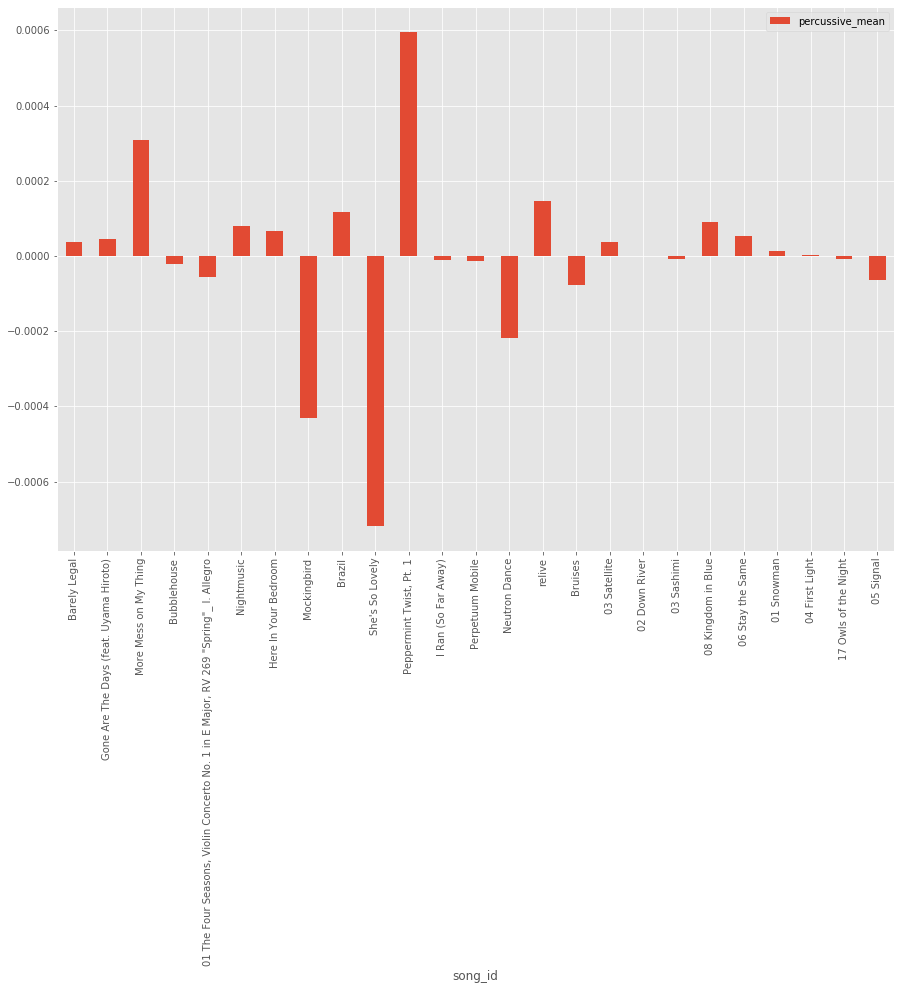

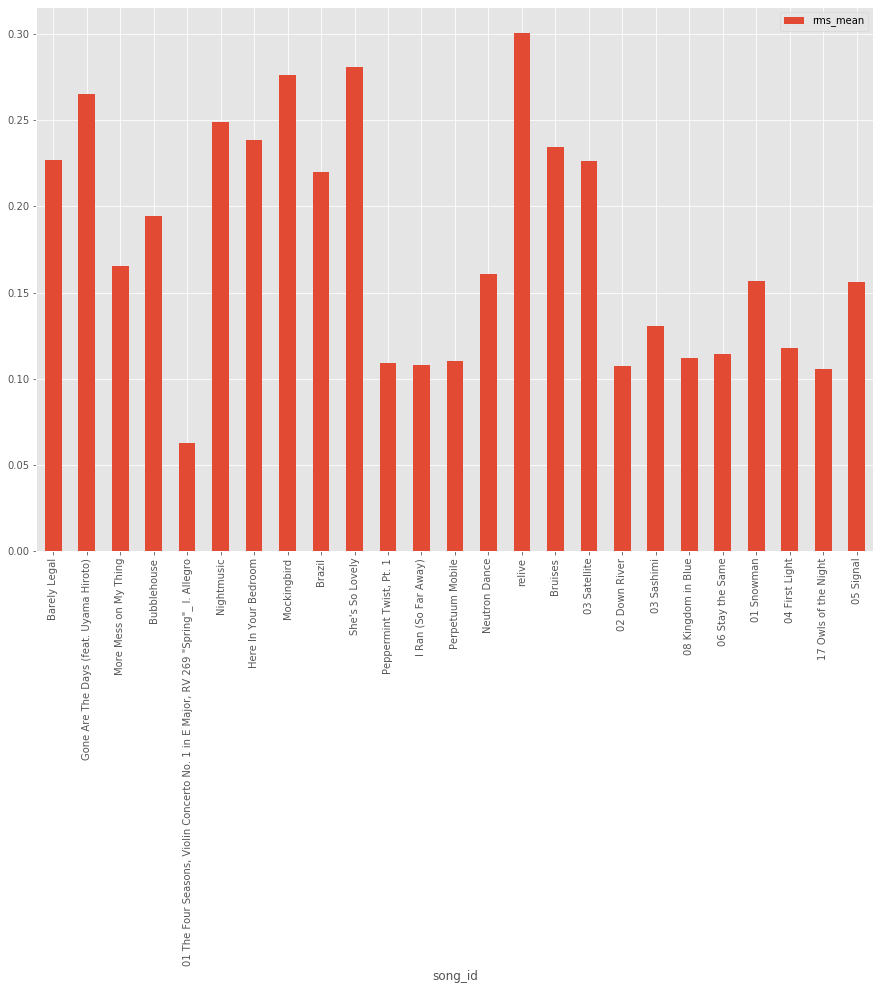

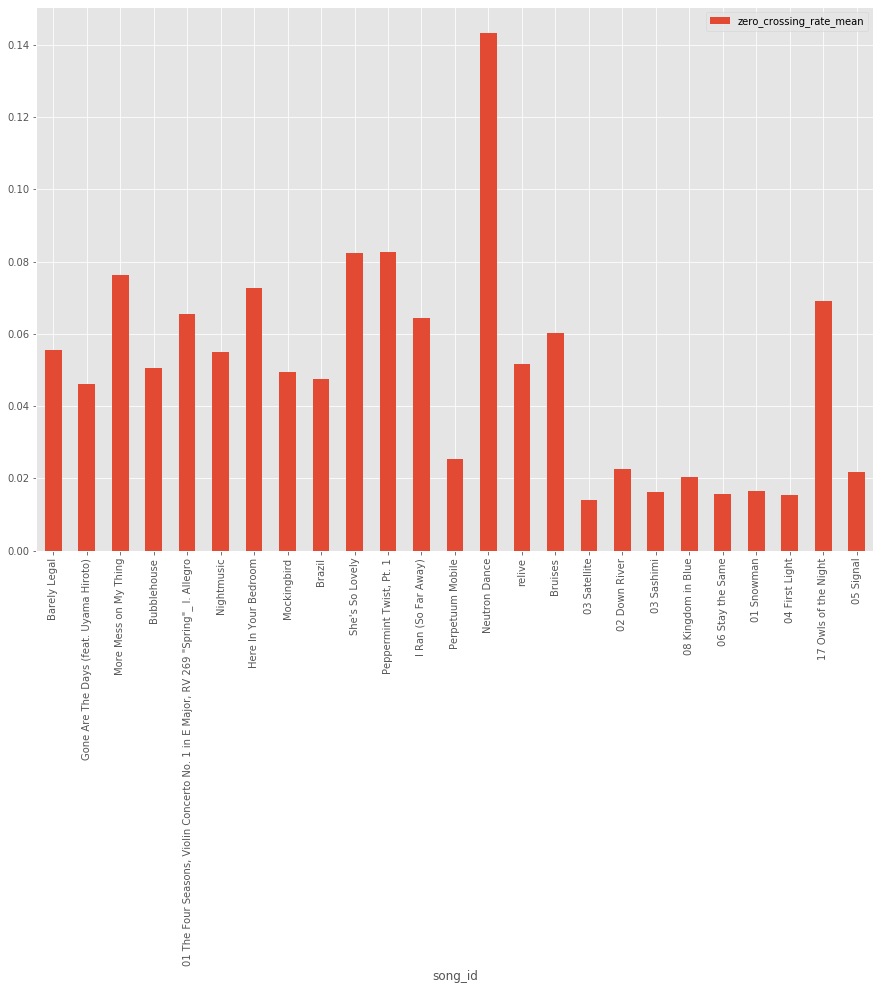

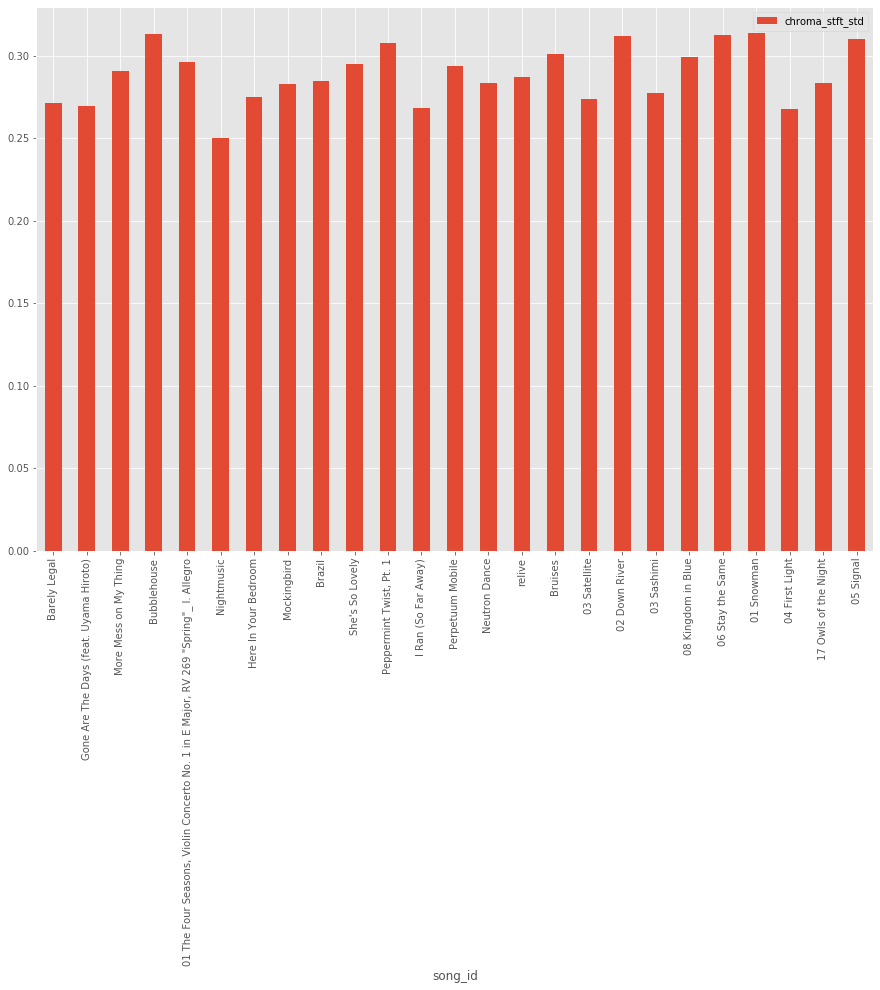

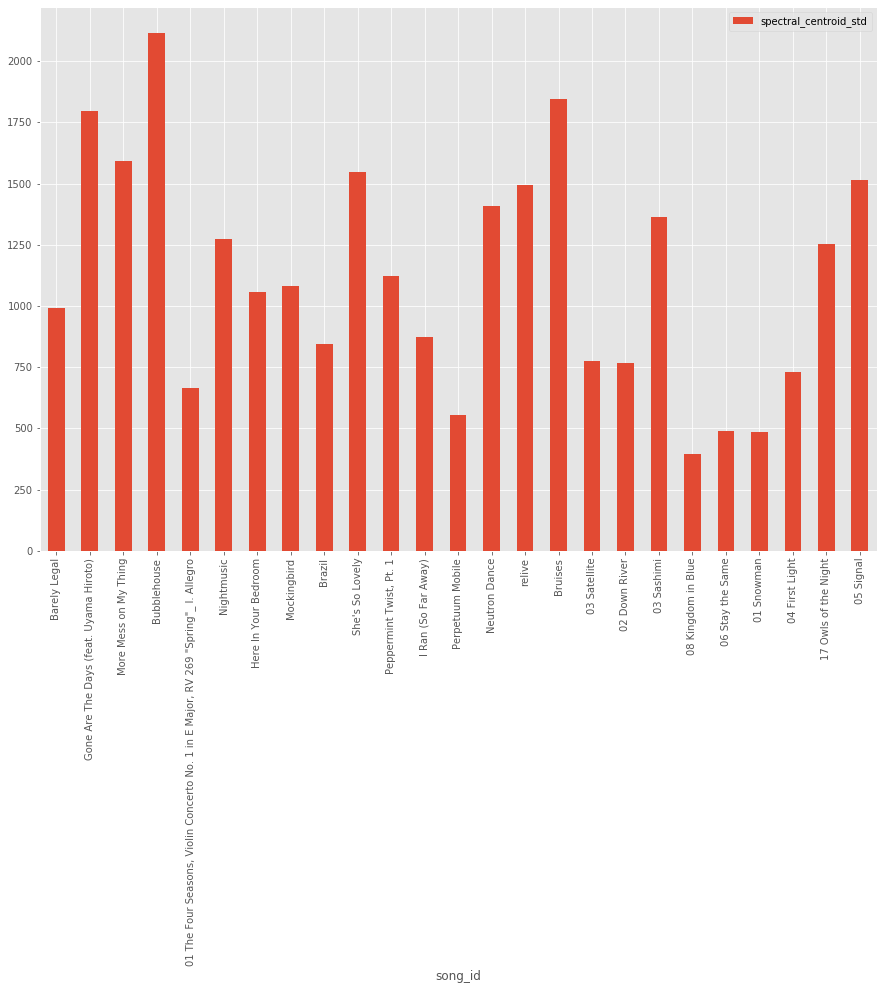

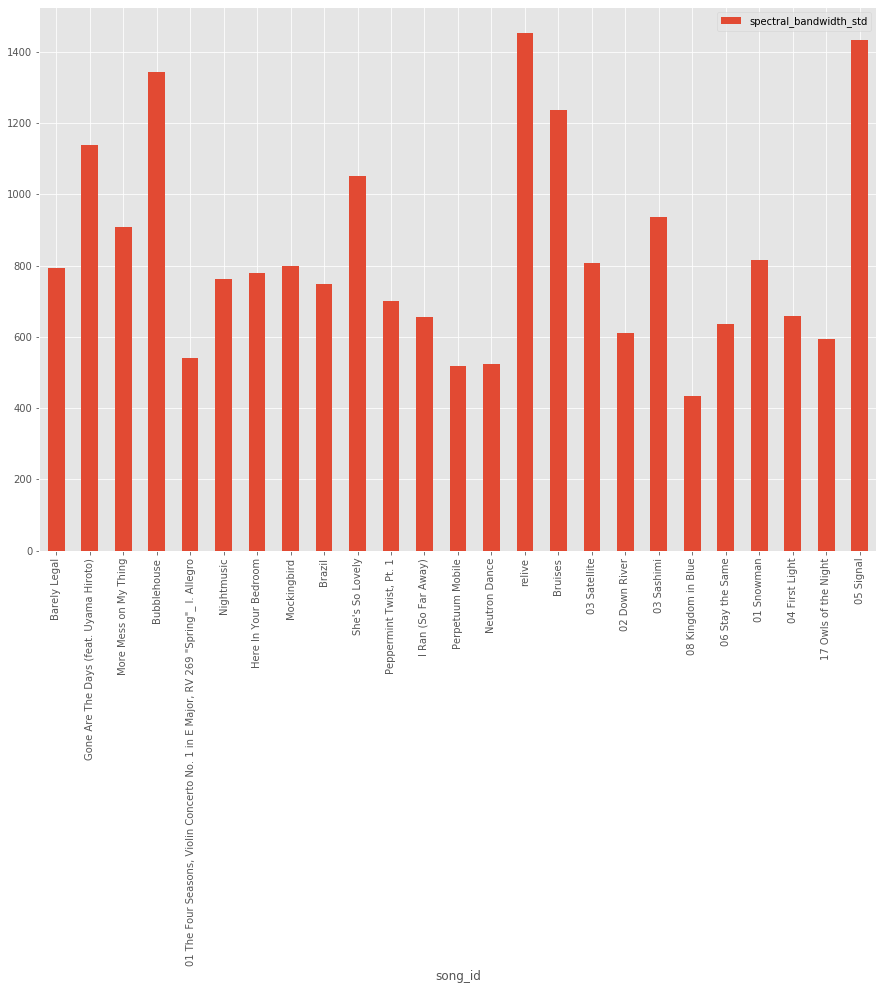

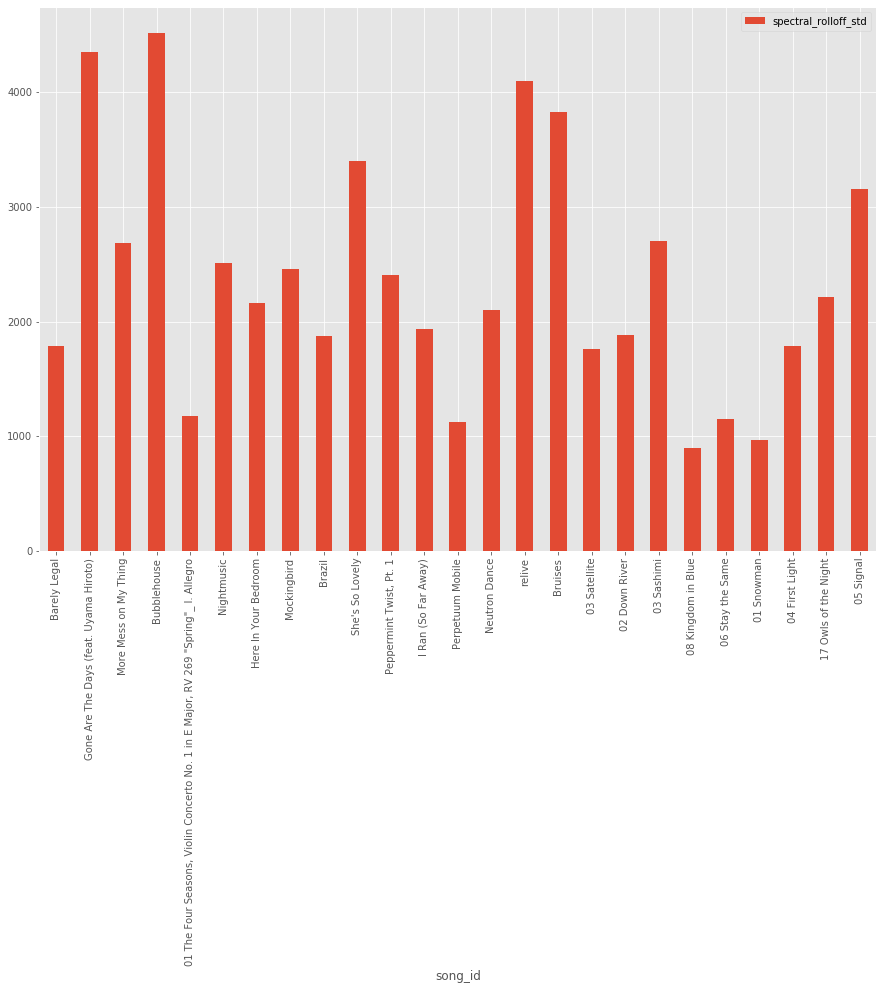

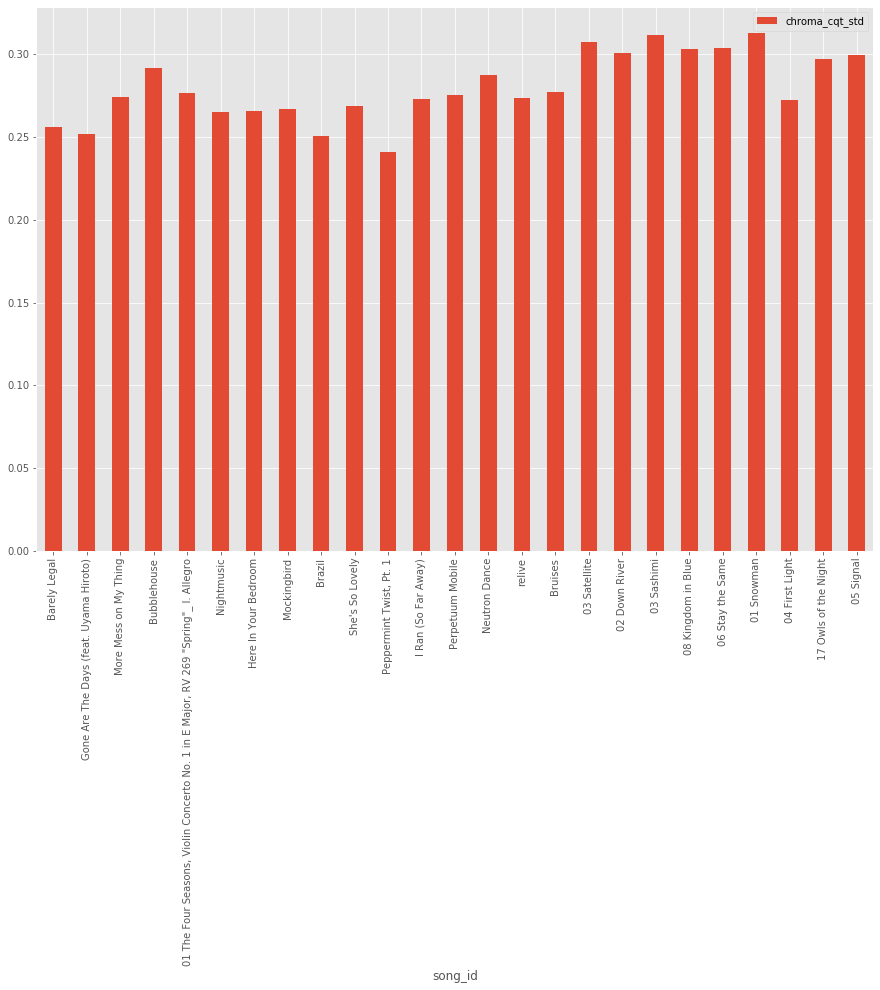

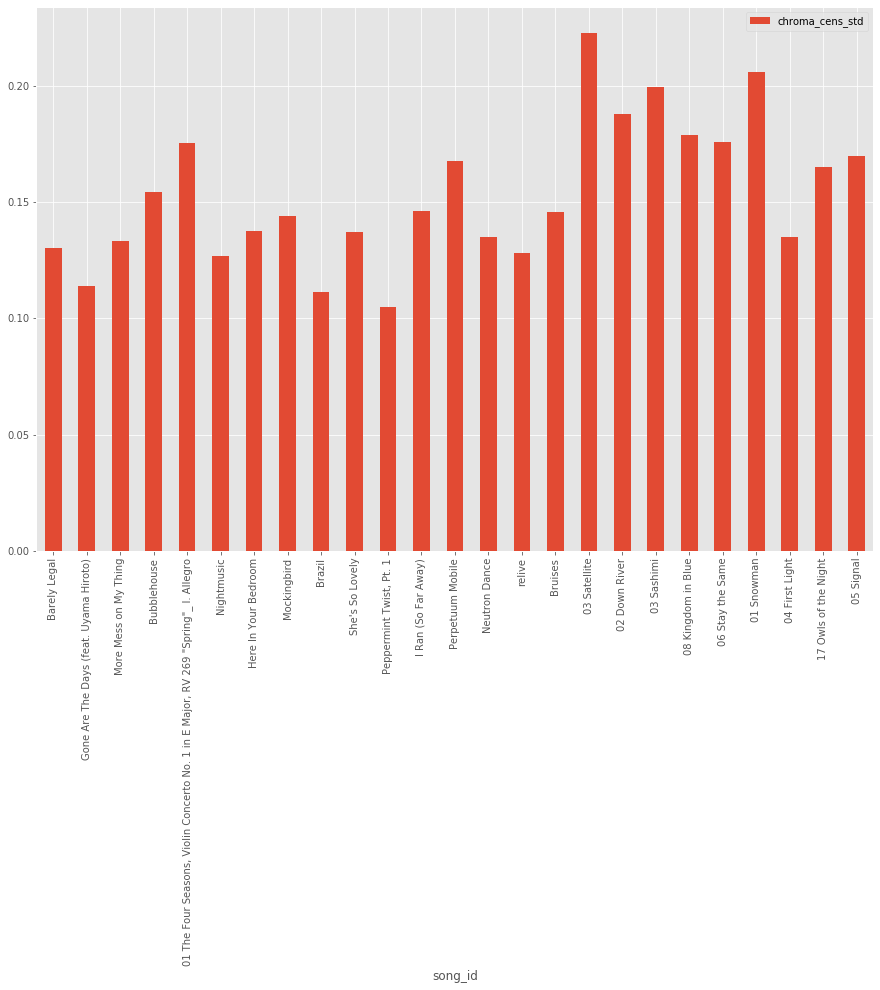

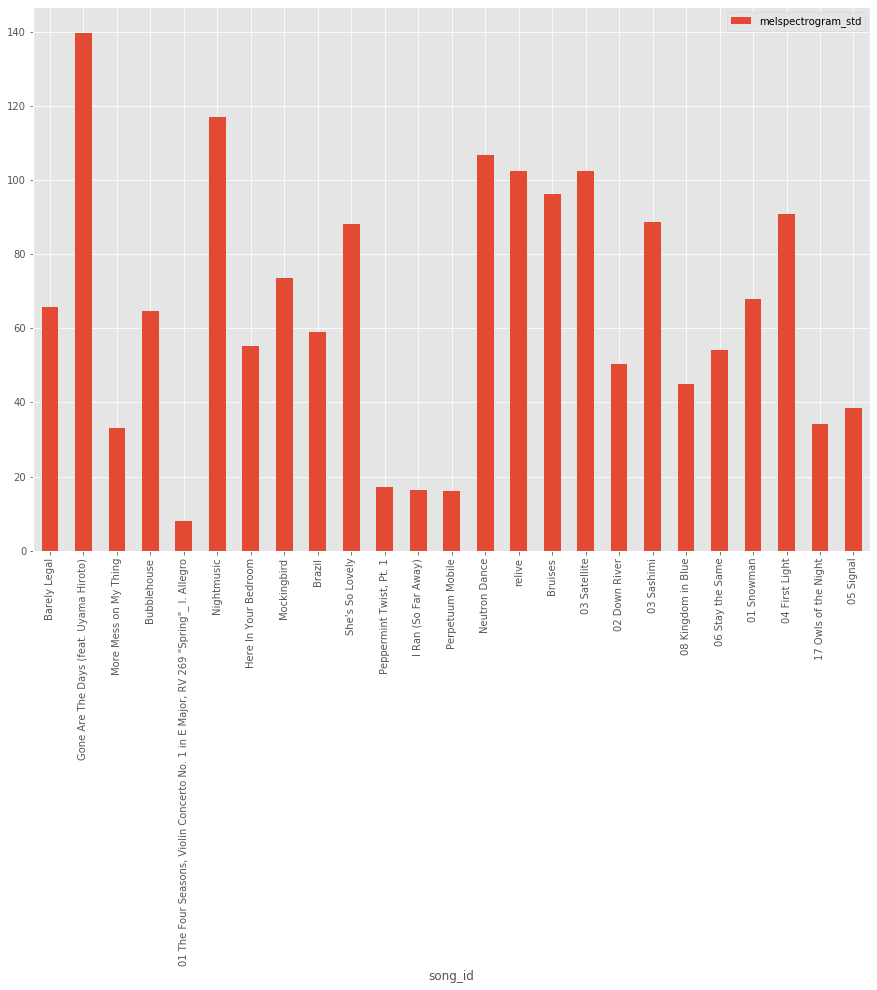

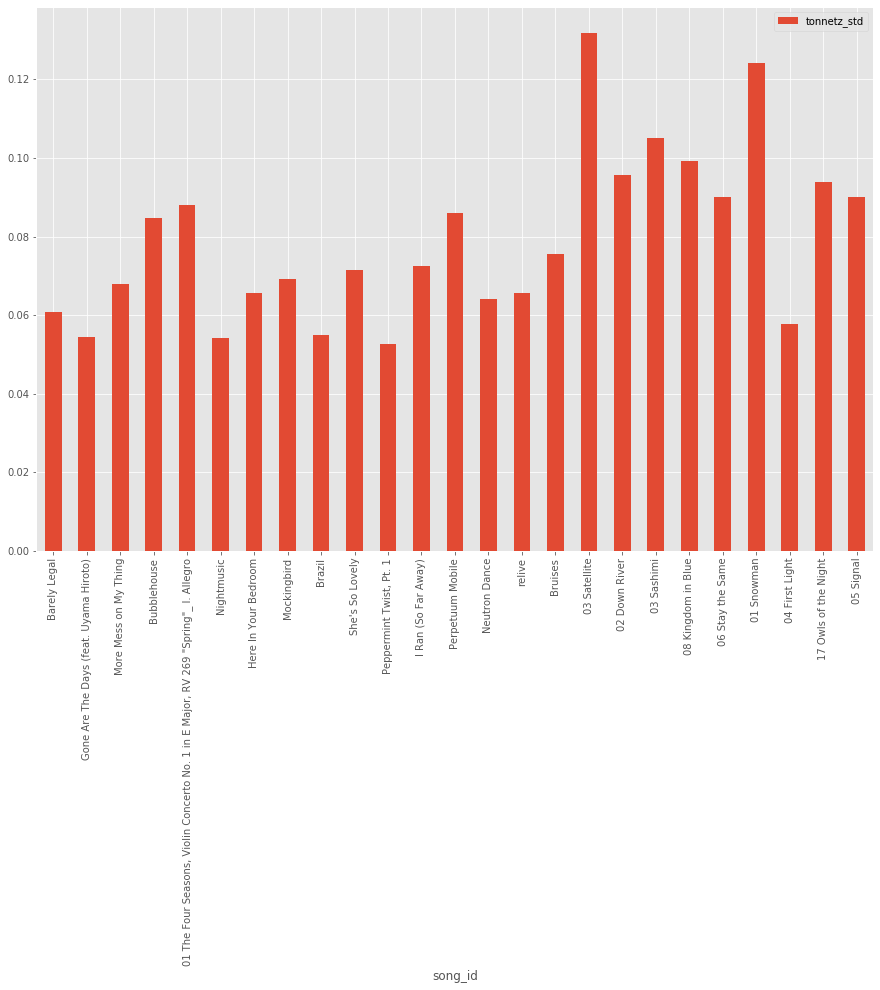

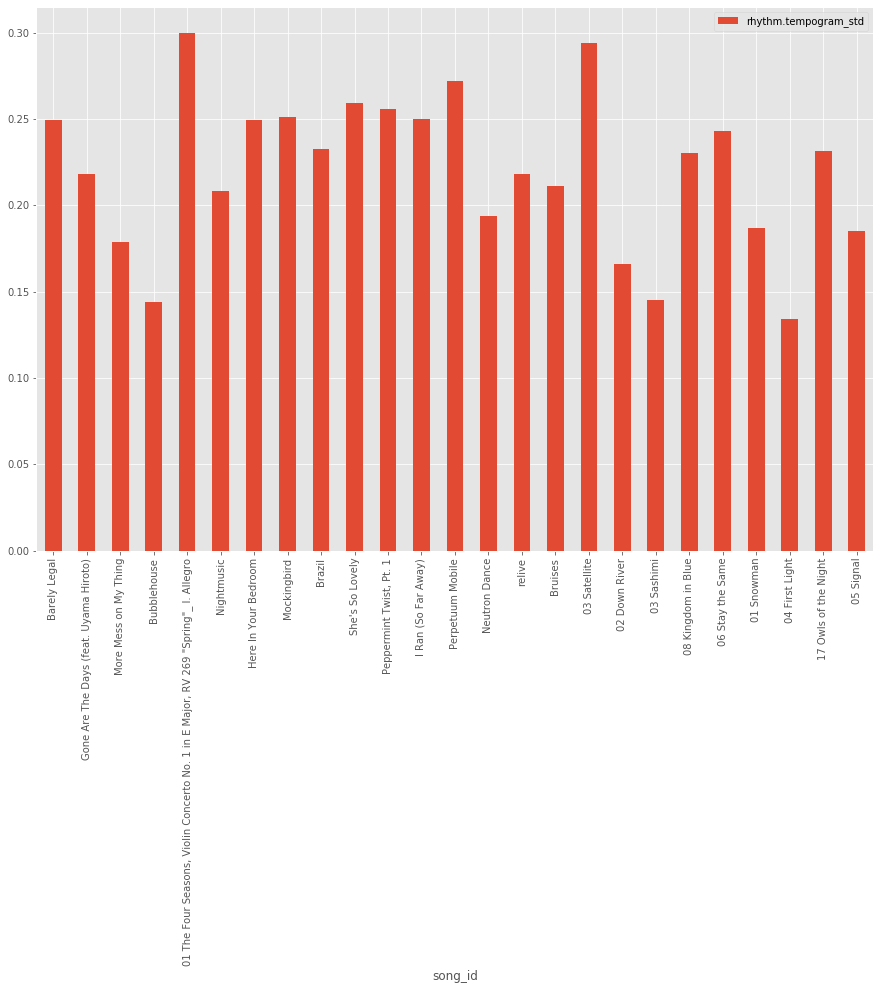

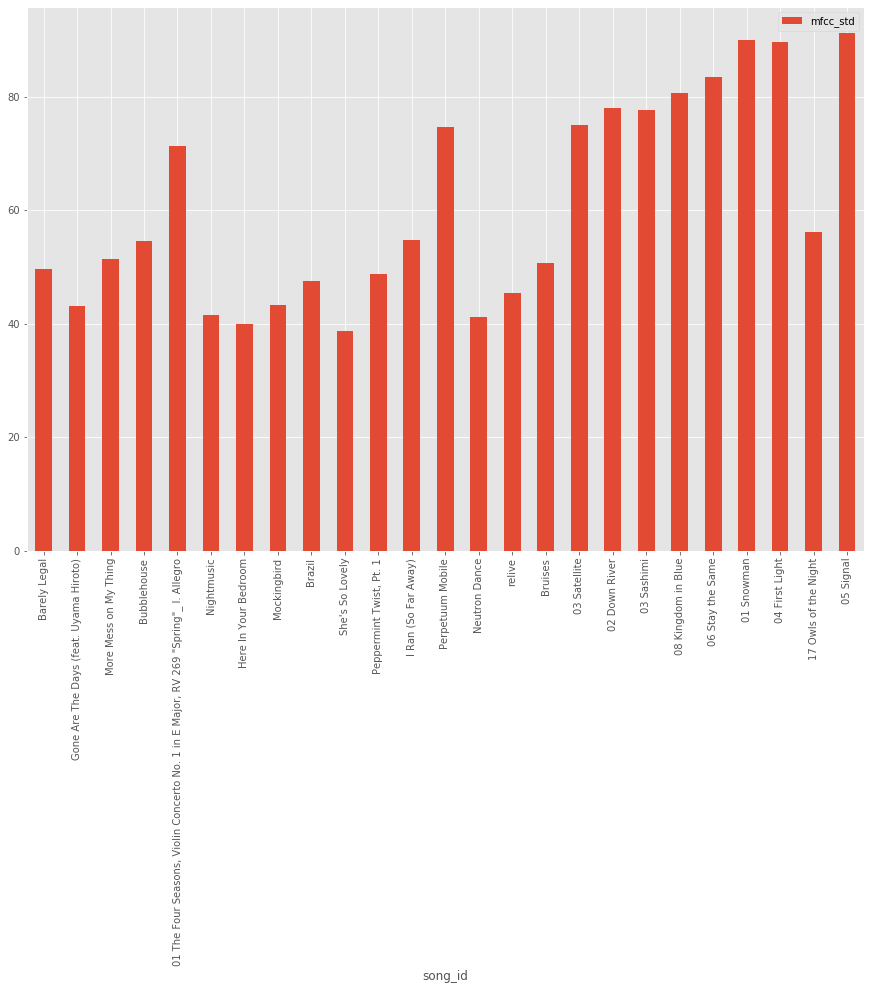

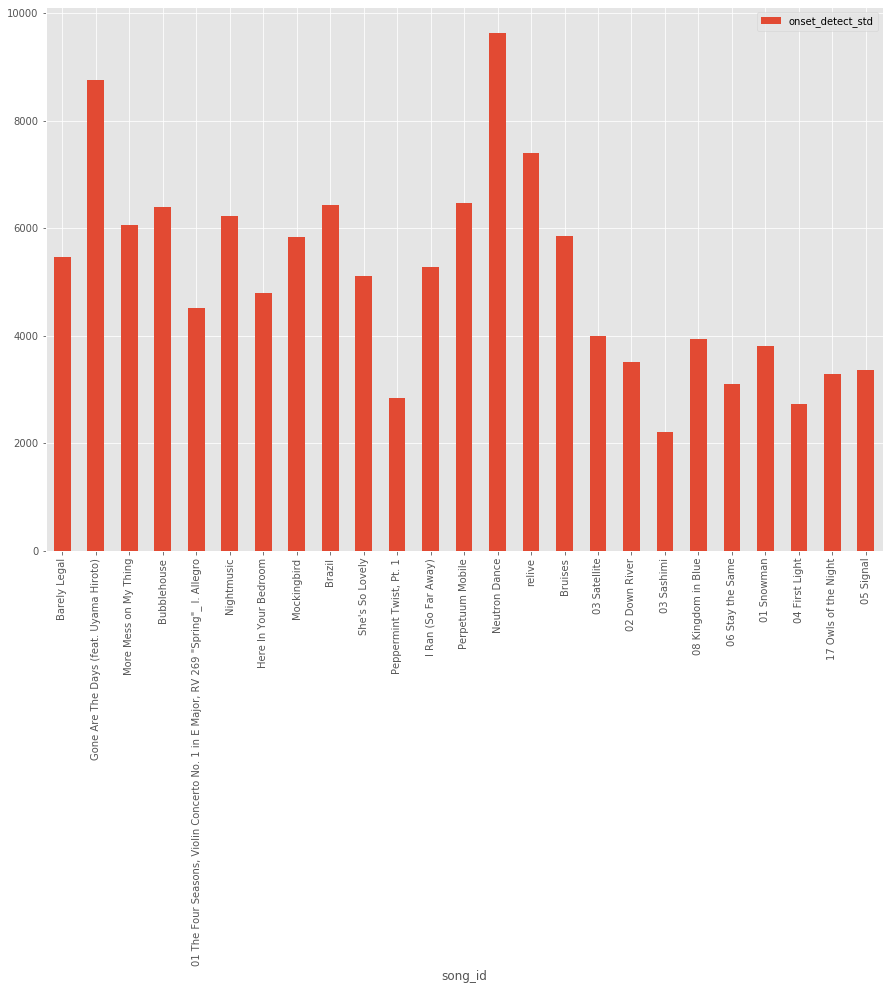

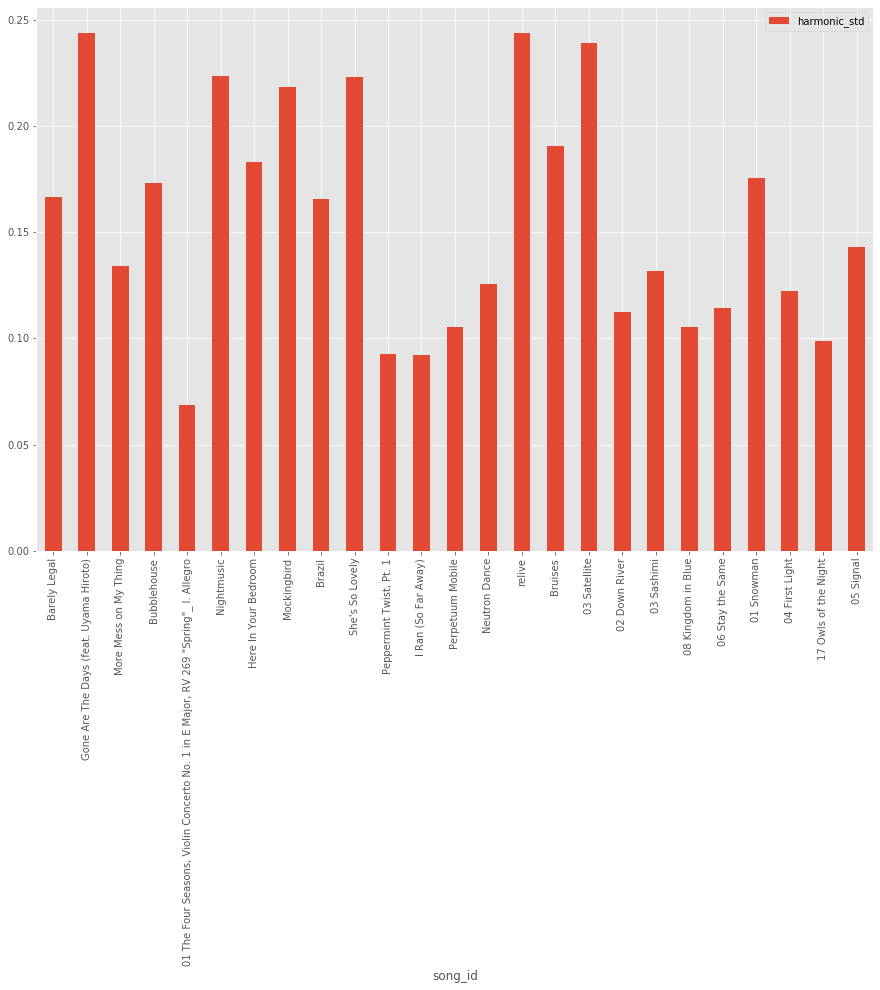

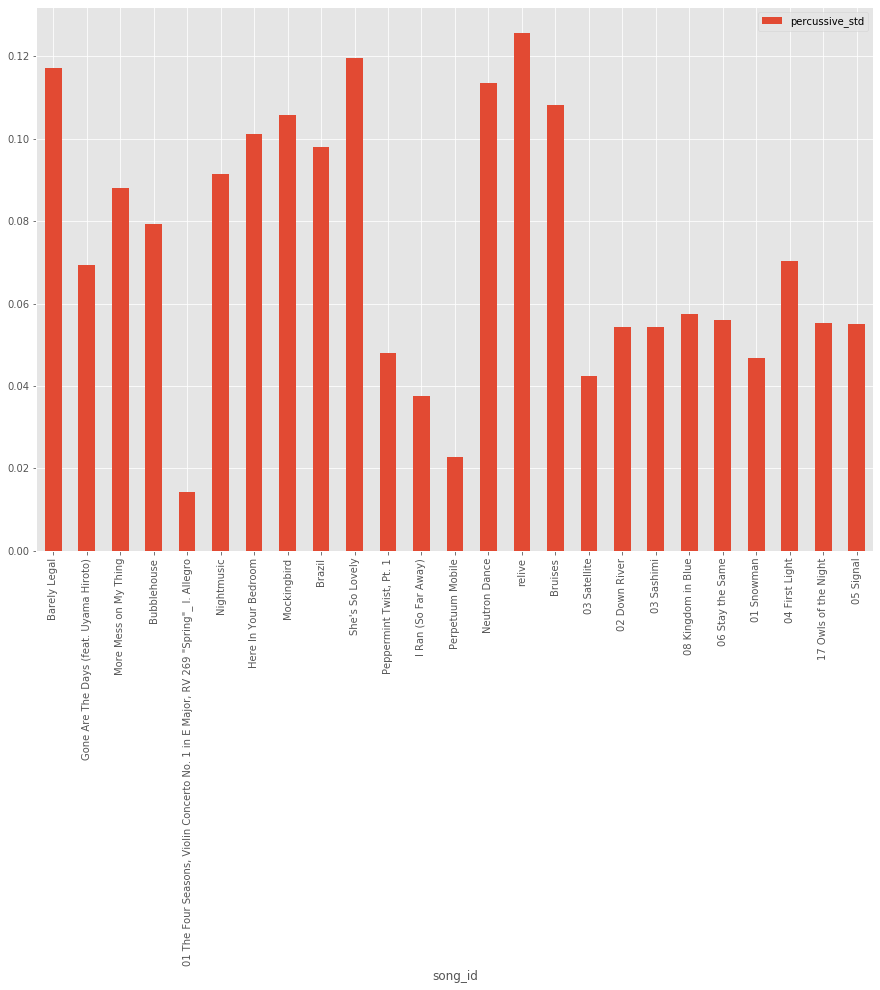

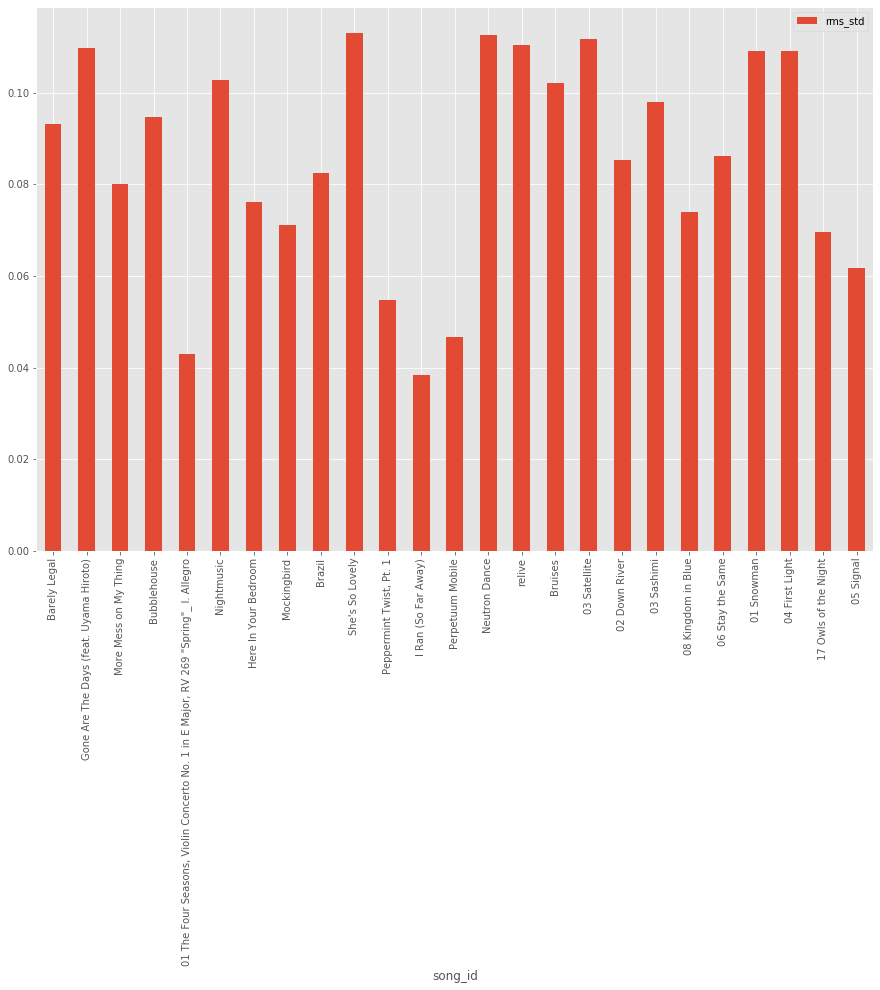

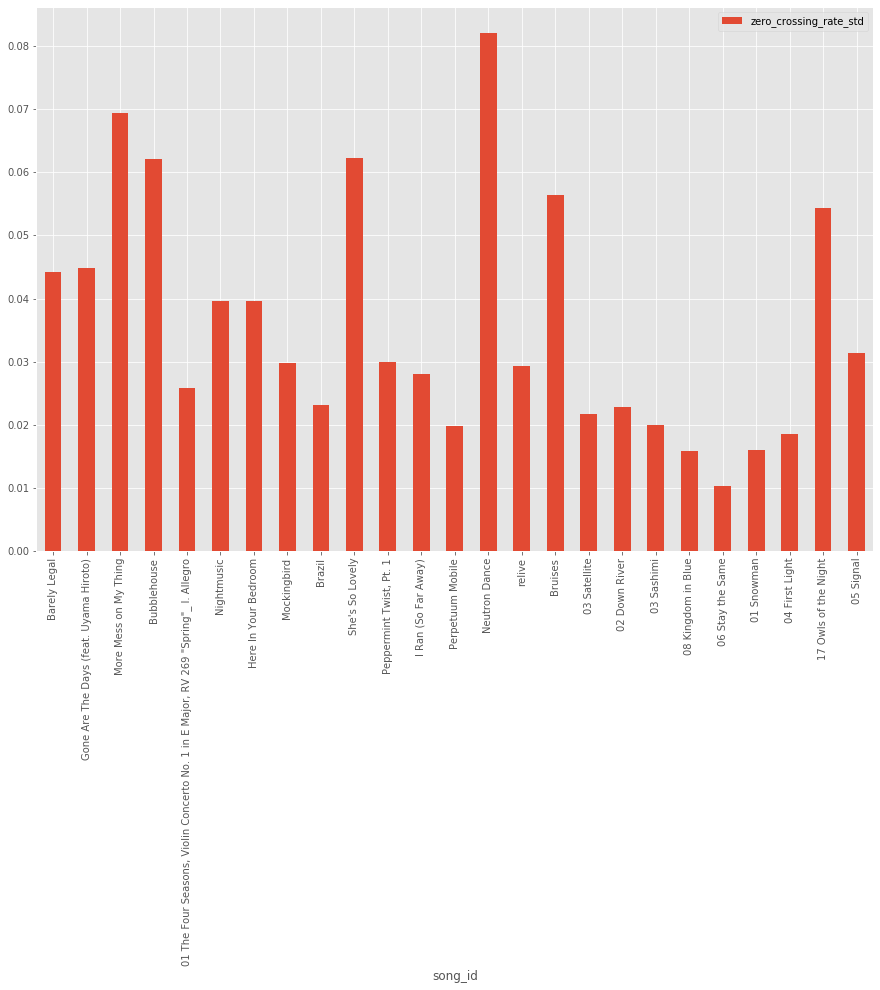

In [60]:
df_all = pd.concat([df, df_lofi])
for col in df_all.drop(['song_id'], axis=1).columns:
    df_all.plot.bar(x='song_id', y=col)